# Understanding Student Final Results Based on Demographic and Performance Data

## Project Overview

Courses are a very effective way for continous education for all age ranges. They provide an effective way to  learn new topics and skills relevant to the current market. In this project, a dataset of student sociodemographic and course performance data is used to understand what characteristics drive a student to pass the course or not. With this data and a thorough analysis, we can discover which factors relate to a specific result for the students.


## Problem Statement 

Since the final results of a student in the course  is a category (Pass,Fail,Withdrawn,Distinction), we are facing a **Multiclass Classification** problem, and we'll need to use models that reflect this.

## Solution Strategy

Since we have a Multiclass Classification problem, we need to use an algorithm that outputs a probability that a student belongs to a certain class, like Pass or Fail. With an algorithm trained on the student data, we can create a machine learning model that, given a student, outputs the probability  of a student belonging to each class. By understanding these probabilities, we can also understand which features are related to specific results.

## Data Reading

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
%matplotlib inline
sns.set()
rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 100
rcParams['font.size'] = 12
rcParams["patch.force_edgecolor"] = True



In [3]:
studentData = pd.read_csv('studentInfo.csv')
studentData.head(10)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
5,AAA,2013J,38053,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,Pass
6,AAA,2013J,45462,M,Scotland,HE Qualification,30-40%,0-35,0,60,N,Pass
7,AAA,2013J,45642,F,North Western Region,A Level or Equivalent,90-100%,0-35,0,120,N,Pass
8,AAA,2013J,52130,F,East Anglian Region,A Level or Equivalent,70-80%,0-35,0,90,N,Pass
9,AAA,2013J,53025,M,North Region,Post Graduate Qualification,NaN,55<=,0,60,N,Pass


The features mean the following:

- code_module – an identification code for a module on which the student is registered. 
- code_presentation - the identification code of the presentation during which the student is registered on the module. 
- id_student – a unique identification number for the student. 
- gender – the student’s gender. 
- region – identifies the geographic region, where the student lived while taking the module-presentation. 
- highest_education – highest student education level on entry to the module presentation. 
- imd_band – specifies the Index of Multiple Depravation band of the place where the student lived during the module-presentation. 
- age_band – band of the student’s age. 
- num_of_prev_attempts – the number times the student has attempted this module. 
- studied_credits – the total number of credits for the modules the student is currently studying. 
- disability – indicates whether the student has declared a disability. 
- final_result – student’s final result in the module-presentation. 

If we take a look at the data types for these features we'll discover more about their nature.

In [4]:
studentData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
code_module             32593 non-null object
code_presentation       32593 non-null object
id_student              32593 non-null int64
gender                  32593 non-null object
region                  32593 non-null object
highest_education       32593 non-null object
imd_band                31482 non-null object
age_band                32593 non-null object
num_of_prev_attempts    32593 non-null int64
studied_credits         32593 non-null int64
disability              32593 non-null object
final_result            32593 non-null object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


According to the information we have about the data types, most of the variables are categorical, instead of numerical. This means that we are dealing with a very **qualitative** dataset. We can now proceed to exploring the dataset.

## Data Exploration

Let's start with summarizing the data. To achieve this, we need to study the variables that are available to  us in the dataset, and find a way to quickly understand their distribution of values. Since the variables are split into two types, Categorical and Numerical, let's first start summarizing the numerical ones. To summarize numerical values, we use **descriptive statistics**. These statistics tell us a lot about the central tendencies of the numerical feature, as well as how the values of the variable are distributed along the data. These statistics include: 

- Mean
- Standard Deviation
- Median 
- 1st Quartile
- 3rd Quatile
- Minimum
- Maximum

Let's summarize the numerical data of the dataset:

In [5]:
studentData.describe()

,id_student,num_of_prev_attempts,studied_credits
count,3.259300e+04,32593.000000,32593.000000
mean,7.066877e+05,0.163225,79.758691
std,5.491673e+05,0.479758,41.071900
min,3.733000e+03,0.000000,30.000000
25%,5.085730e+05,0.000000,60.000000
50%,5.903100e+05,0.000000,60.000000
75%,6.444530e+05,0.000000,120.000000
max,2.716795e+06,6.000000,655.000000


Some key take aways of this summary: 

- The studentID has no real meaning in the data, it's just a way to uniquely identify a student.
- Over 75% of students have not taken the course before.  
- 50% of students have completed 60 credits or more before taking the module again. There are some extreme values for the number of credits as well, since the maximum number of credits that a student has is 655, while the minimum is 30. This means that this module is only available after taking other previous modules. 

We can add a variable to help us distinguish those that have had previous attempt at the module before, by marking those with more than 0 previous attemps with a 1. 

In [6]:
studentData['Has_Previous_Attempts'] = np.where(studentData.num_of_prev_attempts > 0,1,0)
studentData.Has_Previous_Attempts.describe()

count    32593.000000
mean         0.128003
std          0.334098
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Has_Previous_Attempts, dtype: float64

As we can see, 12% of the students have retried the module previously. This accounts for 3911 students. This means that a significant amount of students have either failed the module or withdrawn in a previous time. Let's now summarize the categorical variables. To summarize them, we calculate the following: 

- The number of unique categories.
- The most frequent category. 
- The frequency of this category. 

Let's calculate the summary for all categorical variables:

In [7]:
studentData.describe(include=['O'])

,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,disability,final_result
count,32593,32593,32593,32593,32593,31482,32593,32593,32593
unique,7,4,2,13,5,10,3,2,4
top,BBB,2014J,M,Scotland,A Level or Equivalent,20-30%,0-35,N,Pass
freq,7909,11260,17875,3446,14045,3654,22944,29429,12361


Some key take aways to take from this summary:

- Most course takers are male, however the male:female ratio is mostly balanced. 
- The most common region is Scotland, with more than 10% of course takes inhabiting here. 
- The highest level of education is A level or equivalent.
- Most course takers are young, and most aren't disabled.
- Although most passing was the most common result, other non-passing results are more common overall. 

Let's create a function to better summarize  these categories.

In [8]:
def get_category_summary(data,category):
    category_counts = data[category].value_counts().reset_index()
    category_counts.columns = [category,'Count']
    category_counts['Proportion'] = category_counts['Count'] / category_counts.Count.sum()
    category_counts['Cumulative_Sum'] = category_counts.Count.cumsum()
    category_counts['Cumulative_Proportion'] = category_counts['Cumulative_Sum'] / category_counts.Count.sum()
    return category_counts

In [9]:
get_category_summary(studentData,'region')

,region,Count,Proportion,Cumulative_Sum,Cumulative_Proportion
0,Scotland,3446,0.105728,3446,0.105728
1,East Anglian Region,3340,0.102476,6786,0.208204
2,London Region,3216,0.098671,10002,0.306876
3,South Region,3092,0.094867,13094,0.401743
4,North Western Region,2906,0.089160,16000,0.490903
5,West Midlands Region,2582,0.079219,18582,0.570122
6,South West Region,2436,0.074740,21018,0.644862
7,East Midlands Region,2365,0.072562,23383,0.717424
8,South East Region,2111,0.064769,25494,0.782192
9,Wales,2086,0.064001,27580,0.846194


We can observe that the distribution of regions is relatively close, with 80% of the students being covered in 8 regions. The most common one being Scotland, and the least common one being Ireland. 

In [10]:
get_category_summary(studentData,'highest_education')

,highest_education,Count,Proportion,Cumulative_Sum,Cumulative_Proportion
0,A Level or Equivalent,14045,0.430921,14045,0.430921
1,Lower Than A Level,13158,0.403706,27203,0.834627
2,HE Qualification,4730,0.145123,31933,0.979750
3,No Formal quals,347,0.010646,32280,0.990397
4,Post Graduate Qualification,313,0.009603,32593,1.000000


As for education, most students are either higher than A level or lower than A level. This is fairly common, as not all people are interested in following through higher education, or are in the process of receiving a higher education qualification while taking this module. The least common education level is postgrads, since they wouldn't have as much of a need for taking courses, followed by those with no formal qualifications, as they wouldn't be interested in taking courses as well. 

In [11]:
get_category_summary(studentData,'imd_band')

,imd_band,Count,Proportion,Cumulative_Sum,Cumulative_Proportion
0,20-30%,3654,0.116066,3654,0.116066
1,30-40%,3539,0.112413,7193,0.228480
2,10-20,3516,0.111683,10709,0.340163
3,0-10%,3311,0.105171,14020,0.445334
4,40-50%,3256,0.103424,17276,0.548758
5,50-60%,3124,0.099231,20400,0.647989
6,60-70%,2905,0.092275,23305,0.740264
7,70-80%,2879,0.091449,26184,0.831713
8,80-90%,2762,0.087733,28946,0.919446
9,90-100%,2536,0.080554,31482,1.000000


As for the index of multiple depravation, it seems that the students are mostly centered towards lower values of the variable. However, the distribution of the number of students per band is fairly similar. For comparison, the difference between the most common band (20-30%) and the most uncommon band (90-100%) is only 1000. And in proportion values, this is about 3%. As we can see, from 0 to 50% of the imd_band values, are 55% of the students, while the rest have higher imd values.

In [12]:
get_category_summary(studentData,'final_result')

,final_result,Count,Proportion,Cumulative_Sum,Cumulative_Proportion
0,Pass,12361,0.379253,12361,0.379253
1,Withdrawn,10156,0.311601,22517,0.690854
2,Fail,7052,0.216365,29569,0.907219
3,Distinction,3024,0.092781,32593,1.000000


As for the final results of the course, even if Pass is the most common category, Withdrawn and Fail, both non-passing results, account for 52% of the results. The passing results, Pass and Distinction, only account for 48% of the final results. This means more students are failing or withdrawing than completing the module. This is alarming information for both potential students and organizers of the module.

Let's now visualize the data to understand the relationships between variables better. 

## Data Visualization

Let's first start with visualizing the target variable, the result of the module, against other categorical variables. To visualize them, we'll use the most ideal type of plot for this kind of relationship between variables: a countplot. A countplot uses two categories to draw multiple bars, and uses the amount of data that match both categoriess to draw the height of the bars. The higher the bar, the higher number of students match both categories. One combination of categories could be, passing students that live in Ireland.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


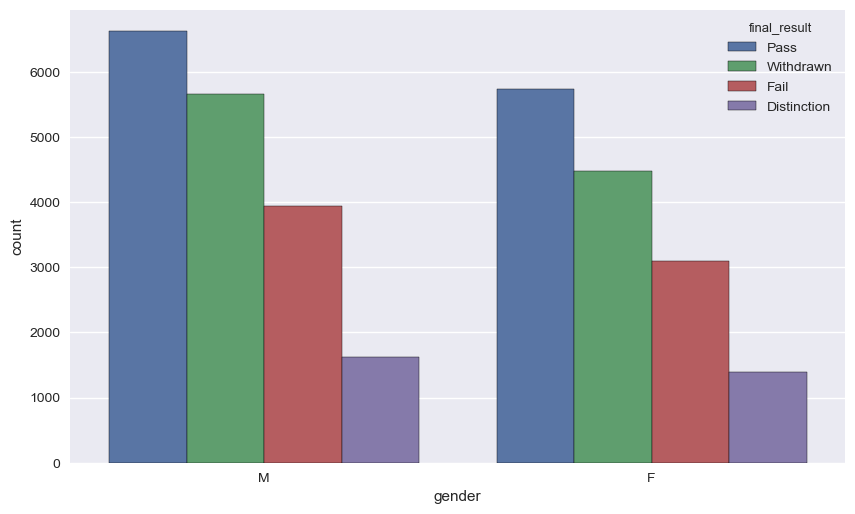

In [13]:
sns.countplot(x="gender", hue="final_result", data=studentData)

There isn't much difference for module results between genders. This makes sense because in an academic activity, such as enrolling, participating and completing a course, there are no differences in performance between genders.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


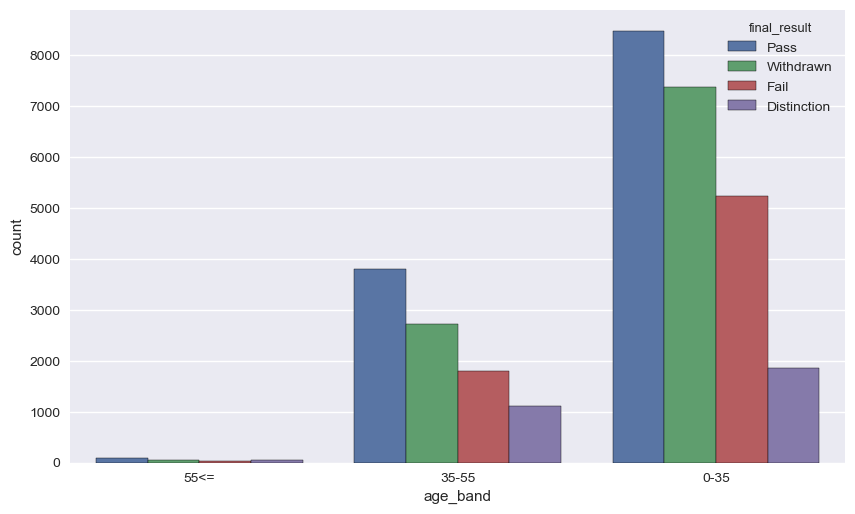

In [14]:
sns.countplot(x="age_band", hue="final_result", data=studentData)

On the age bands,  there isn't much difference between categories. There is one major difference in the distinction rate however, where the proportion of distinctions in the older students is much higher than the ones for the younger students. This is especially true for the oldest students, where the distinction rate is higher than both the failure and withdrawal rate.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


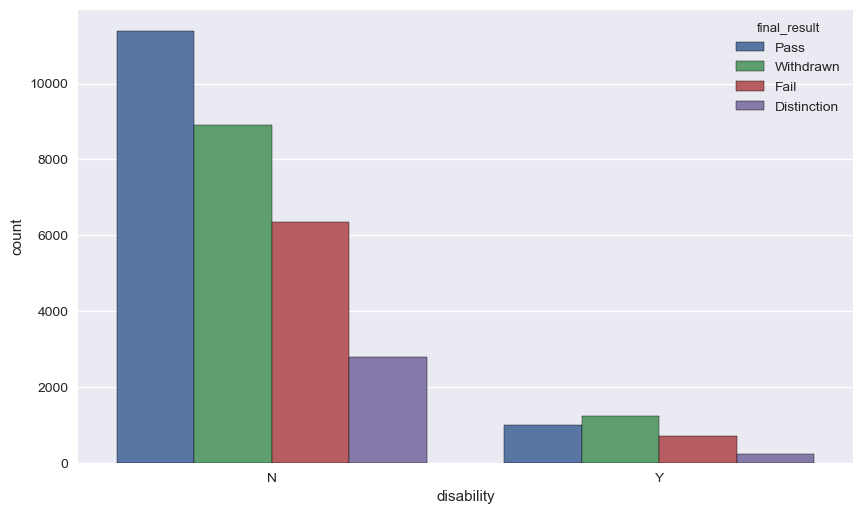

In [15]:
sns.countplot(x="disability", hue="final_result", data=studentData)

Students that present a disability are more likely to Withdraw or fail than those that don't. This is disheartening, because a disability shouldn't prevent students from doing well in the course.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


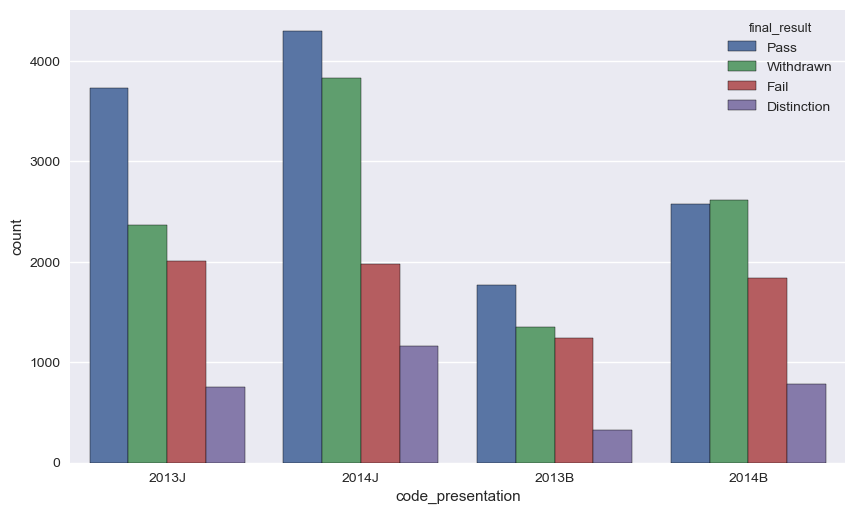

In [16]:
sns.countplot(x="code_presentation", hue="final_result", data=studentData)

Some specific  code presentations, like 2014B and 2014J have a much higher withdrawal rate than the 2013 code presentations. This means that the 2013 students had better performance than the 2014 ones. Maybe some undisclosed differences in how the module was presented between years that resulted in the increase in withdrawals between years. However, the 2014 classes had a much higher distinction rate, which indicate an increase of excellent students, even at the expense of a higher withdrawal rate. 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


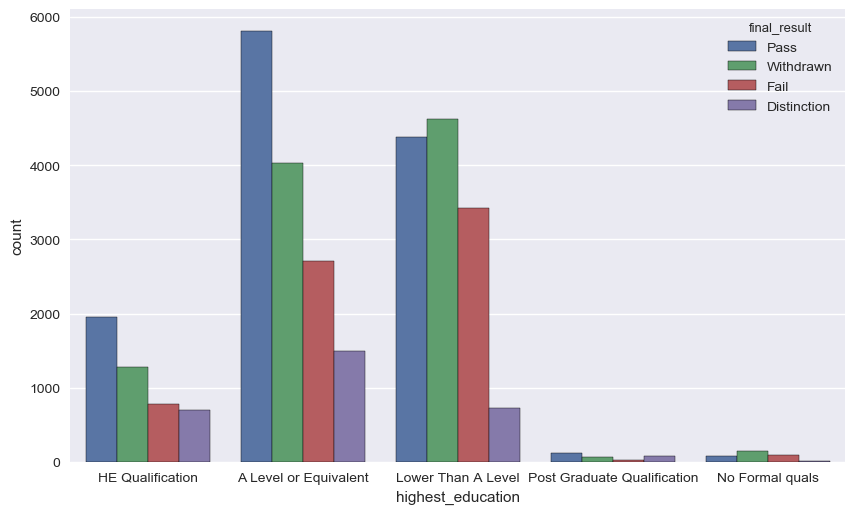

In [17]:
sns.countplot(x="highest_education", hue="final_result", data=studentData)

Let's break down the distribution of results according to the education level: 

- Those with no formal qualifications have by the far the lowest distinction rates, and the highest withdrawal and failure rates of all education levels.

- Those with post graduate qualifications have the highest passing and distinction rates.

- The students with lower than A level education have very high  withdrawal and failure rates.

- A level or equivalent have  a high distinction and passing rate. Higher Education levels reflect this as well. 

In general, higher education levels present higher performance in the module than those with lower education levels.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


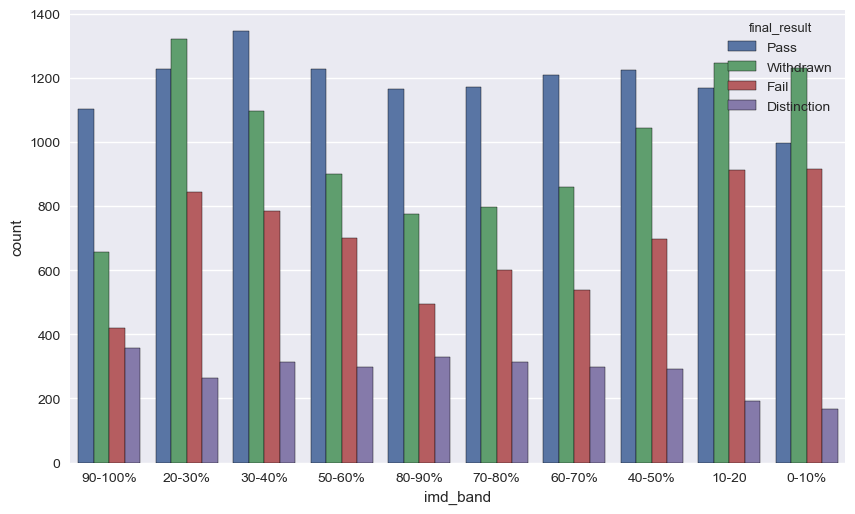

In [18]:
sns.countplot(x="imd_band", hue="final_result", data=studentData)

Students that live in places with a lower index of multiple depravation tend to have higher withdrawal and failing rates than those of higher imd. This seems to be a consistent behavior among  the imd bands.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

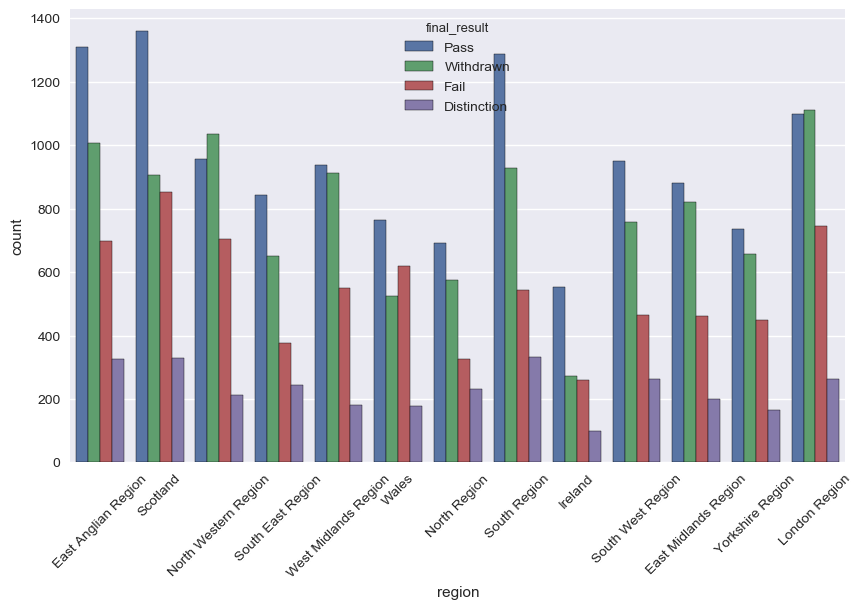

In [19]:
sns.countplot(x="region", hue="final_result", data=studentData)
plt.xticks(rotation=45)

Some regions have vastly different final results for the course. Wales has a much higher failure rate in comparison to other results, while London and Northwestern have a higher withdrawal rate. These seem to reflect the results of the imd bands, since these variables are related. 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


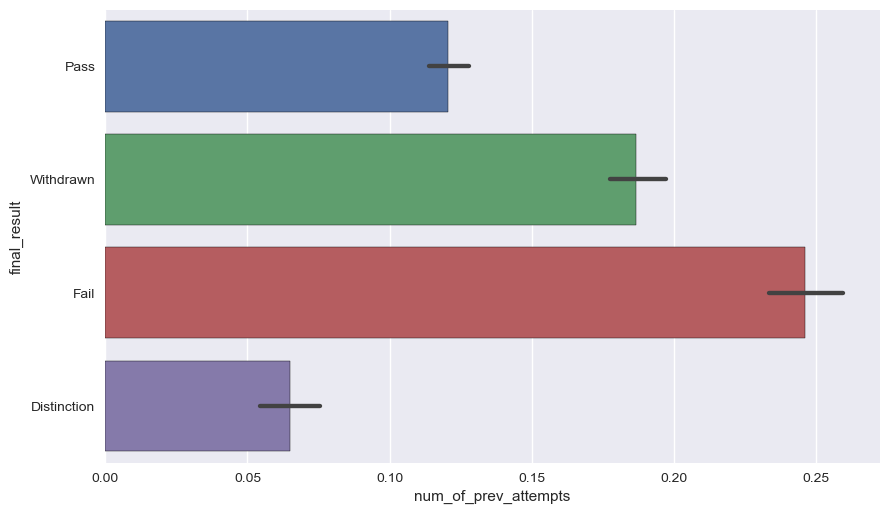

In [20]:
sns.barplot(x="num_of_prev_attempts",y="final_result",data=studentData)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


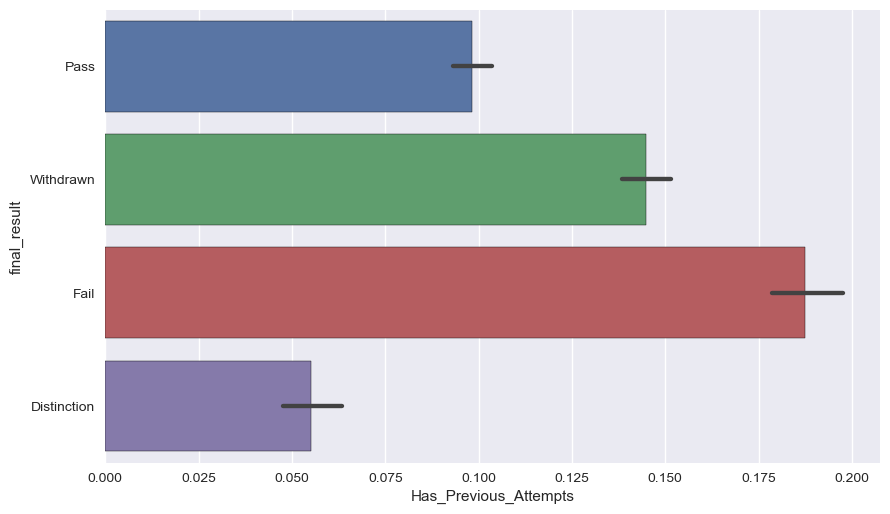

In [21]:
sns.barplot(x="Has_Previous_Attempts",y="final_result",data=studentData)

On average, students that failed the module had already participated in it previously. In fact,  20% of the students that retook the module, had failed while 15% of the student that retook the module, withdrew. 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


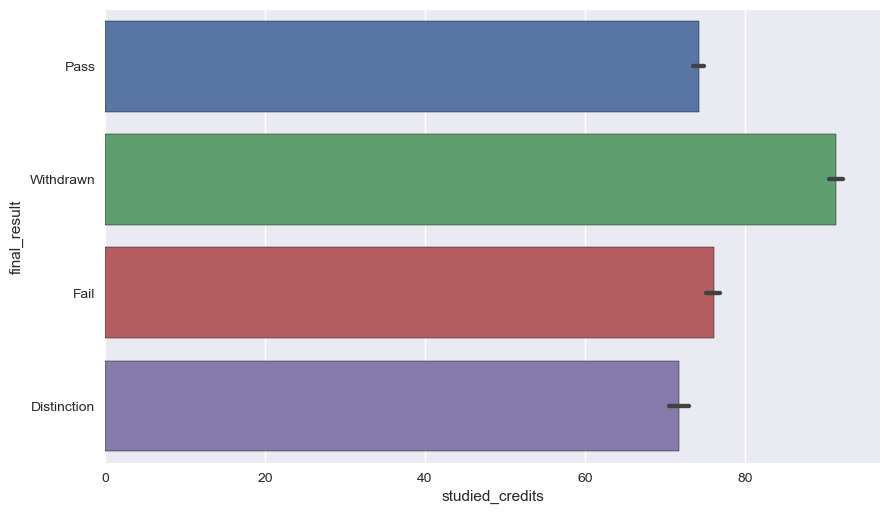

In [22]:
sns.barplot(x="studied_credits",y="final_result",data=studentData)

Students that withdraw have a higher number of credits than average. This oversaturation of credits may be the reason that they withdraw in the first place.

We now have a better understanding of the target variable. Let's now clean the data and prepare it for modelling. 

## Data Cleaning

Let's start first by checking how many missing values exist in the data. We can do this by counting the number of NULLs in the data for each variable. If the null count is greater than 0, then this variable has missing values. Let's check it out for our student data.

In [23]:
pd.isnull(studentData).sum()

code_module                 0
code_presentation           0
id_student                  0
gender                      0
region                      0
highest_education           0
imd_band                 1111
age_band                    0
num_of_prev_attempts        0
studied_credits             0
disability                  0
final_result                0
Has_Previous_Attempts       0
dtype: int64

The imd_band is missing from 1,111 students. Let's create a subset of the data, including only those where the imd_band is missing, to try to find out a pattern.

In [24]:
missing_imd_band = studentData.loc[pd.isnull(studentData.imd_band)]
missing_imd_band.head(20)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,Has_Previous_Attempts
9,AAA,2013J,53025,M,North Region,Post Graduate Qualification,NaN,55<=,0,60,N,Pass,0
17,AAA,2013J,71361,M,Ireland,HE Qualification,NaN,35-55,0,60,N,Pass,0
28,AAA,2013J,104476,M,Ireland,Post Graduate Qualification,NaN,35-55,0,60,N,Pass,0
34,AAA,2013J,114017,F,North Region,Post Graduate Qualification,NaN,35-55,0,60,N,Pass,0
65,AAA,2013J,172112,M,Ireland,HE Qualification,NaN,35-55,0,60,N,Pass,0
66,AAA,2013J,172797,F,Ireland,A Level or Equivalent,NaN,35-55,0,60,N,Pass,0
68,AAA,2013J,175392,M,North Region,HE Qualification,NaN,35-55,0,60,N,Pass,0
88,AAA,2013J,227517,M,Ireland,HE Qualification,NaN,0-35,0,180,N,Fail,0
180,AAA,2013J,376439,M,North Region,HE Qualification,NaN,0-35,0,60,N,Distinction,0
184,AAA,2013J,386924,M,Ireland,Lower Than A Level,NaN,0-35,0,120,N,Pass,0


When working with missing data we have to figure out if the data is **missing at random** or **missing on purpose**. If it's missing at random, we can fill the values with some criteria. If they are missing on purpose, unless we have knowledge of the system that generated this data, we can not fill in the missing values. Upon inspection of the data, there doesn't seem to be a clear pattern as to why the data is missing, so we can declare that the data is missing at random. Now we have to come up with a strategy for filling the missing values.

One possible strategy is filling them with the most common value in the data, or the mode. However, since the imd_band is related to the place the student was living in, let's fill the missing values with the most common imd_band for each region. This will give us a more accurate estimate of the value when it's missing.

In [25]:
prev_imd_band = studentData["imd_band"]
studentData["imd_band"] = studentData.groupby("region")["imd_band"].transform(lambda x: x.fillna(x.value_counts().index[0]))
pd.isnull(studentData).sum()

code_module              0
code_presentation        0
id_student               0
gender                   0
region                   0
highest_education        0
imd_band                 0
age_band                 0
num_of_prev_attempts     0
studied_credits          0
disability               0
final_result             0
Has_Previous_Attempts    0
dtype: int64

In [26]:
studentData.loc[studentData.index.isin(missing_imd_band.index)]

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,Has_Previous_Attempts
9,AAA,2013J,53025,M,North Region,Post Graduate Qualification,10-20,55<=,0,60,N,Pass,0
17,AAA,2013J,71361,M,Ireland,HE Qualification,0-10%,35-55,0,60,N,Pass,0
28,AAA,2013J,104476,M,Ireland,Post Graduate Qualification,0-10%,35-55,0,60,N,Pass,0
34,AAA,2013J,114017,F,North Region,Post Graduate Qualification,10-20,35-55,0,60,N,Pass,0
65,AAA,2013J,172112,M,Ireland,HE Qualification,0-10%,35-55,0,60,N,Pass,0
66,AAA,2013J,172797,F,Ireland,A Level or Equivalent,0-10%,35-55,0,60,N,Pass,0
68,AAA,2013J,175392,M,North Region,HE Qualification,10-20,35-55,0,60,N,Pass,0
88,AAA,2013J,227517,M,Ireland,HE Qualification,0-10%,0-35,0,180,N,Fail,0
180,AAA,2013J,376439,M,North Region,HE Qualification,10-20,0-35,0,60,N,Distinction,0
184,AAA,2013J,386924,M,Ireland,Lower Than A Level,0-10%,0-35,0,120,N,Pass,0


With this, we have filled the missing values from the data. Now let's follow up with preparing the data for modelling. 

In what we've seen of the categorical values, these can be separated into two types: 

- Ordinal: The values follow a specific order (Age: 0-35 < 35-55 < 55+) 
- Nominal: The values follow no order: (Gender).

Since machine learning models only accept numbers, we need to convert this categories into numbers.We can replace Ordinal categories with numbers, and Nominal categories into separate columns, where each unique value takes one column. Let's first create a copy of the data, which we'll use to create our models later on.

In [27]:
model_studentData = studentData.copy()

Next, let's create a function that will convert categorical values into a numbered order. The function will accept the pandas series that contains all the values for a variable, and a dictionary that will contain the replacement number for each value. 

In [28]:
def convert_ordinal_number(category,values):
    return category.replace(values)

Next, let's apply this function to all variables.

In [29]:
model_studentData['gender'] = convert_ordinal_number(model_studentData.gender,{'M':0,'F':1})

For gender, the actual order doesn't matter, since there are only 2 possible values.

In [30]:
model_studentData['highest_education'] = convert_ordinal_number(model_studentData.highest_education,
                                                               {'No Formal quals':0,
                                                                'Lower Than A Level':1,
                                                               'A Level or Equivalent':2,
                                                               'HE Qualification':3,
                                                               'Post Graduate Qualification':4})

For highest education, the order is the following: No Formal Quals < Lower Than A Level < A Level or Equivalent < HE Qualification < Post Graduate Qualification.

In [31]:
model_studentData['imd_band'] = convert_ordinal_number(model_studentData.imd_band,
                                                      {
                                                          '0-10%':0,
                                                          '10-20':1,
                                                          '20-30%':2, 
                                                          '30-40%':3, 
                                                          '40-50%':4,
                                                          '50-60%':5,
                                                          '60-70%':6,
                                                          '70-80%':7,
                                                          '80-90%':8,
                                                          '90-100%':9
                                                      })

For IMD values, they were ordered according to the percentage values of the band. In order, from 0 to 100.

In [32]:
model_studentData['age_band'] = convert_ordinal_number(model_studentData.age_band,
                                                      {
                                                          '0-35':0,
                                                          '35-55':1,
                                                          '55<=':2
                                                      })

For age values, they were ordered from youngest to oldest.

In [33]:
model_studentData['disability'] = convert_ordinal_number(model_studentData.disability,{'Y':1,'N':0})

Since disabilities have only two possible values, the order for this variable also doesn't matter.

In [34]:
model_studentData['final_result'] = convert_ordinal_number(model_studentData.final_result,{'Pass':0,'Withdrawn':1,
                                                                                          'Fail':2,'Distinction':3})

For the final result, the order also doesn't matter. This is because the models that we use will separate each possible final result into distinct, unrelated values. 

In [35]:
model_studentData.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,Has_Previous_Attempts
0,AAA,2013J,11391,0,East Anglian Region,3,9,2,0,240,0,0,0
1,AAA,2013J,28400,1,Scotland,3,2,1,0,60,0,0,0
2,AAA,2013J,30268,1,North Western Region,2,3,1,0,60,1,1,0
3,AAA,2013J,31604,1,South East Region,2,5,1,0,60,0,0,0
4,AAA,2013J,32885,1,West Midlands Region,1,5,0,0,60,0,0,0


With this, the replacement values for the ordinal variables are complete. And now for nominal variables. First let's drop features that aren't going to be used in modelling. These are: 

- code_module + code_presentation: Both variables are assumptions that are stuck in time. This means that if we create a model to estimate performance, and the presentation of the module surges as a meaningful feature, it would have little effect on predicting the performance of presentations of the courses, since we have no data from them. 

- ID_Student: IDs have no bearing in model performance, since by nature they are unique, and there is no distinction between their values.

In [36]:
model_studentData = model_studentData.drop(['code_module','code_presentation','id_student'],axis=1)
model_studentData.head()

,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,Has_Previous_Attempts
0,0,East Anglian Region,3,9,2,0,240,0,0,0
1,1,Scotland,3,2,1,0,60,0,0,0
2,1,North Western Region,2,3,1,0,60,1,1,0
3,1,South East Region,2,5,1,0,60,0,0,0
4,1,West Midlands Region,1,5,0,0,60,0,0,0


Then replace the region with one column per region. To do this, we create a dummy matrix, which contains one column per unique value of the category, and one row per student. Each data point will contain either a 1 or 0. If it contains a 1, it means the student lives in this region, and a 0 otherwise. This means that a student can only have a 1 in one of the categories, and a 0 in the rest.

In [37]:
region_dummies = pd.get_dummies(model_studentData.region)
region_dummies.head()

,East Anglian Region,East Midlands Region,Ireland,London Region,North Region,North Western Region,Scotland,South East Region,South Region,South West Region,Wales,West Midlands Region,Yorkshire Region
0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0


Finally, we append this data to the original data, and eliminate the previous region column.

In [38]:
model_studentData[region_dummies.columns] = region_dummies
model_studentData.drop('region',axis=1,inplace=True)
model_studentData.head()

,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,Has_Previous_Attempts,East Anglian Region,...,London Region,North Region,North Western Region,Scotland,South East Region,South Region,South West Region,Wales,West Midlands Region,Yorkshire Region
0,0,3,9,2,0,240,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,3,2,1,0,60,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,2,3,1,0,60,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,2,5,1,0,60,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,1,5,0,0,60,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


With this, the data is prepared, and we are now ready for modelling.

## Data Modelling

As this is a multiclass classification problem, we should look at exploring models  that allow for multiclass classification. Before selecting a model, we must first divide the data into the training data, and the target variable. This is for easier modelling further down the road.

In [39]:
X = model_studentData.drop('final_result',axis=1)
y = model_studentData.final_result

To train and evaluate models, we'll use 5-Fold cross validation on the default parameters for the models. For the evaluation metric, we'll use the F1 Score. The F1-score is the harmonic mean between precision, a metric that measures how well a model is capturing true positives against false positives,  and recall, a metric that measures how well a model is capturing true positives against false negatives. Since the target variable is imbalanced, that is the amount of students for each final result is different, we need to use a metric that accounts for this imbalance. The F1 Score is ideal for this, since it only has high values if the model is predicting well for the imbalanced classes. Specifically, we'll use the micro averaging of the F1 Score, which calculates the metrics globally by counting the total true positives, false negatives and false positives, instead of per class.

In [40]:
from sklearn.model_selection import cross_val_score

#### Logistic Regression

Let's first start with a simple model. Logistic Regression is a model that maps a linear function of the feature into the output variable.Like all regression analyses, the logistic regression is a predictive analysis.  Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables. This means, it assigns a weight to each feature, multiplies the value of the feature by the weight, adds a constant value called the intercept, applies a transformation to this sum (mostly the sigmoid or logistic function, hence the name), and the result of this transformation is the final output.  The output of logistic regression is a number between 0 and 1, which means it's a probability. For multiclass classification, this output is converted into one probability for each class. 

Logistic regression is named for the function used at the core of the method, the logistic function.

The logistic function, also called the sigmoid function was developed by statisticians to describe properties of population growth in ecology, rising quickly and maxing out at the carrying capacity of the environment. It’s an S-shaped curve that can take any real-valued number and map it into a value between 0 and 1, but never exactly at those limits.

![title](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2016/03/Logistic-Function.png)

Logistic Regression also gives ease in interpretability, since to evaluate a change on the final probability, we just have to simulate change in the values for the features.

In [41]:
from sklearn.linear_model import LogisticRegressionCV
log_reg = LogisticRegressionCV()
validation = cross_val_score(log_reg,X=X,y=y,cv=5,verbose=5,scoring='f1_micro')
print("The average F1 Score was {}".format(validation.mean()))

[CV]  ................................................................
[CV] ....................... , score=0.4011654654194143, total=  18.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   18.5s remaining:    0.0s


[CV] ....................... , score=0.4020555299892622, total=  20.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   38.9s remaining:    0.0s


[CV] ....................... , score=0.4347959496778152, total=  19.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   58.5s remaining:    0.0s


[CV] ....................... , score=0.4090211721386928, total=  20.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.3min remaining:    0.0s


[CV] ...................... , score=0.44038668098818473, total=  20.7s
The average F1 Score was 0.41748495964267385


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.7min finished


#### Decision Tree

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

Some advantages of decision trees are:

- Simple to understand and to interpret. Trees can be visualised.
- Requires little data preparation. Other techniques often require data normalisation, dummy variables need to be created and blank values to be removed.
- The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree.
- Able to handle both numerical and categorical data. Other techniques are usually specialised in analysing datasets that have only one type of variable. See algorithms for more information.
- Able to handle multi-output problems.
- Uses a white box model. If a given situation is observable in a model, the explanation for the condition is easily explained by boolean logic.
- Possible to validate a model using statistical tests. That makes it possible to account for the reliability of the model.
- Performs well even if its assumptions are somewhat violated by the true model from which the data were generated.

The disadvantages of decision trees include:

- Decision-tree learners can create over-complex trees that do not generalise the data well. This is called overfitting.  Mechanisms such as pruning (not currently supported), setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.
- Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.

- Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree.

![title](http://engineering.pivotal.io/images/interpreting-decision-trees-and-random-forests/reg_dt_path.png)

In [42]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
validation = cross_val_score(dtree,X=X,y=y,cv=5,verbose=5,scoring='f1_micro')
print("The average F1 Score was {}".format(validation.mean()))

[CV]  ................................................................
[CV] ....................... , score=0.3740223892041098, total=   0.2s
[CV]  ................................................................
[CV] ...................... , score=0.36677404509894157, total=   0.1s
[CV]  ................................................................

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s



[CV] ....................... , score=0.3807916538815588, total=   0.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s remaining:    0.0s


[CV] ...................... , score=0.37925744093280145, total=   0.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.9s remaining:    0.0s


[CV] ....................... , score=0.3455577719809728, total=   0.1s
The average F1 Score was 0.36928066021967687


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.2s finished


#### Random Forest 

Random Forest is a supervised learning algorithm. Like you can already see from it’s name, it creates a forest and makes it somehow random. The „forest“ it builds, is an ensemble of Decision Trees, most of the time trained with the “bagging” method. The general idea of the bagging method is that a combination of learning models increases the overall result. To say it in simple words: Random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction.

![title](https://cdn-images-1.medium.com/max/1600/0*tG-IWcxL1jg7RkT0.png)


Random Forest adds additional randomness to the model, while growing the trees. Instead of searching for the most important feature while splitting a node, it searches for the best feature among a random subset of features. This results in a wide diversity that generally results in a better model. Therefore, in Random Forest, only a random subset of the features is taken into consideration by the algorithm for splitting a node. You can even make trees more random, by additionally using random thresholds for each feature rather than searching for the best possible thresholds (like a normal decision tree does).

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10)
validation = cross_val_score(rf,X=X,y=y,cv=5,verbose=5,scoring='f1_micro')
print("The average F1 Score was {}".format(validation.mean()))

[CV]  ................................................................
[CV] ....................... , score=0.3576138629044625, total=   0.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] ...................... , score=0.36079153244362633, total=   0.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


[CV] ....................... , score=0.3711261123043879, total=   0.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.2s remaining:    0.0s


[CV] ...................... , score=0.36207425590671993, total=   0.8s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.2s remaining:    0.0s


[CV] ...................... , score=0.34110787172011664, total=   1.0s
The average F1 Score was 0.35854272705586265


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.3s finished


#### Ridge Regression

Ridge regression is an extension for linear/logistic regression. It’s basically a regularized linear regression model.
A fact we need to notice about ridge regression is that it enforces the β coefficients or weights to be lower, but it does not enforce them to be zero. That is, it will not get rid of irrelevant features but rather minimize their impact on the trained model.

In [44]:
from sklearn.linear_model import RidgeClassifierCV
ridge = RidgeClassifierCV()
validation = cross_val_score(ridge,X=X,y=y,cv=5,verbose=5,scoring='f1_micro')
print("The average F1 Score was {}".format(validation.mean()))

[CV]  ................................................................
[CV] ....................... , score=0.4174206410059807, total=   0.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ....................... , score=0.4048166896763307, total=   0.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV] ....................... , score=0.4409328014728444, total=   0.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.6s remaining:    0.0s


[CV] ....................... , score=0.4136238109849647, total=   0.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.9s remaining:    0.0s


[CV] ....................... , score=0.4420745741905785, total=   0.2s
The average F1 Score was 0.42377370346613985


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.2s finished


Out of the 3 models, ridge regression has had the best cross validation performance on the data. However, since the objective of the project is to understand the target variable better, we can use the ways to interpret the models to get insight of the behavior of the target variable.

## Model Interpretation
First, let's visualize a confusion matrix for the decision tree classifier. In a confusion matrix, each column represents the class the model predicted, while each row represents the real class for this column. 

![title](https://www.dataschool.io/content/images/2015/01/confusion_matrix2.png)

This helps us understand where the model is having a hard time predicting, and which classes are most often "confused".

In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=555)
dtree = DecisionTreeClassifier(max_depth=5)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [46]:
predictions = dtree.predict(X_test)
conf_matrix = confusion_matrix(y_test,predictions)
conf_matrix

array([[1771,  559,   95,    0],
       [1154,  821,   83,    0],
       [ 954,  383,   86,    0],
       [ 479,  121,   13,    0]], dtype=int64)

For example, in this confusion matrix the most confusing class is the first (Passing), where each class has a very high false passing rate. However, the passing class itself has a decent true classification rate, while the rest of the classes have a lower true classification rate, specially distinctions. 

Let's try to interpret the decision tree created to inspect how it makes decisions.

In [56]:
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
dot_data = export_graphviz(dtree, out_file=None, 
                                feature_names=X.columns,  
                                class_names=['Pass','Withdraw','Fail','Distinction'],
                          filled=True)

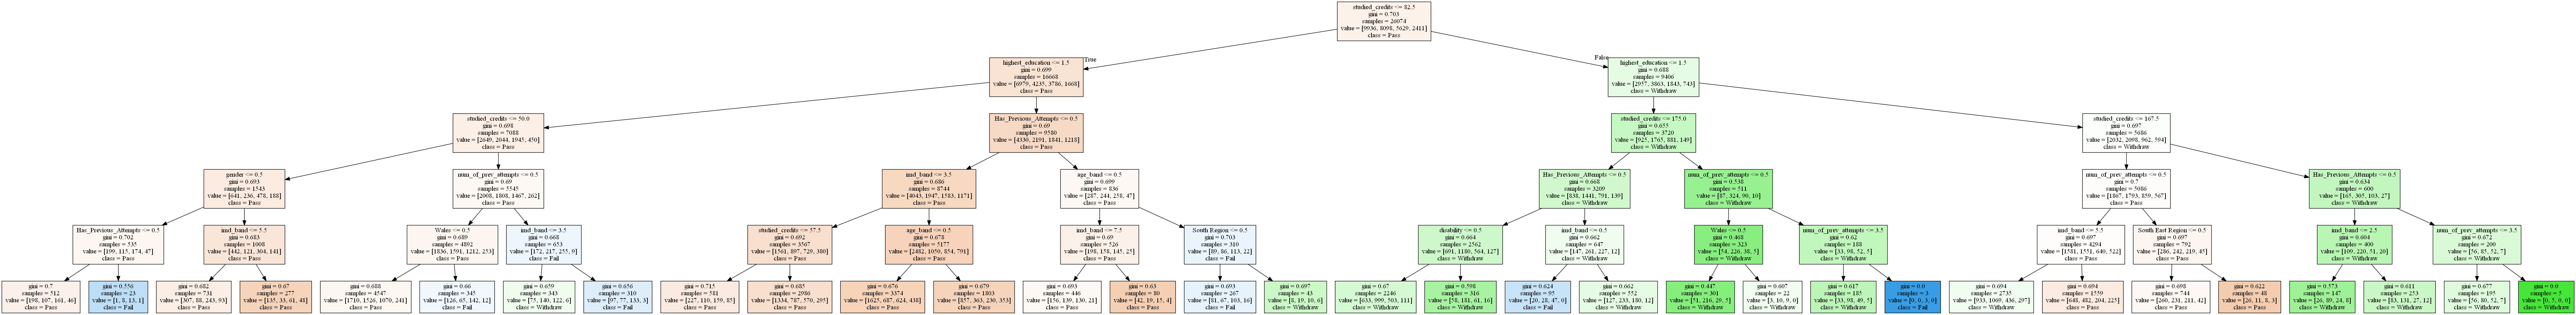

In [57]:
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

The key insights to take from this decision tree are: 

- The most dividing feature is the amount of credits studied. It seems most students that took over 80 credits failed or withdrew the module, while those that took less than that amount passed. 

- The purest withdrawal tree route is : Students with more than 180 credits, lower levels of education, with no previous attempts at the module. This route has a 70% withdrawal rate. 

- The pruest passing tree route is : Students with less than 80 credits, of higher levels of education, with no previous attempts and high imd_band values. These have a close to 50% passing rate. 


Let's now interpret another model, Logistic Regression. To interpret the results of Logistic Regression, we take the coefficients learned by the model, and study their values as well as their sign or direction. Since we are dealing with multiple classes, we have a set of coefficients per class.

In [ ]:
log_reg.fit(X_train,y_train)

In [ ]:
coefficient_df = pd.DataFrame({
    'Features':X_train.columns.tolist(),
    'Pass_Coef':log_reg.coef_[0],
    'Withdraw_Coef':log_reg.coef_[1],
    'Fail_Coef':log_reg.coef_[2],
    'Distinction_Coef':log_reg.coef_[3]
})
coefficient_df

Since there are a lot of small coefficients, that have little bearing in the final predictions, let's study only those coefficients higher than 0.01. 

In [ ]:
coefficient_df[(coefficient_df > 0.01) | (coefficient_df < -0.01)]

Let's take a look at some meaningful coefficient values per class: 

- For passing, having a disability or previous attempts at the module diminish the probability of passing, while higher imd_band, education values and being female slighlty increase it. 

- For withdrawals, being from a certain region like Wales or Ireland drastically reduces the probability of withdrawal, while regions like North Western and West Midlands increase it. Higher values of education also decrease the probability of withdrawal, while having a disability increases it. 

- As for failures, just having previous attempts at the module increases the probability of the model outputting the failure class. 

- And finally, for distinctions, having higher education or age increases the probability of being in the distinction class. 